# 事先准备


## PyTorch的安装

In [1]:
#!pip install torch torchvision

In [2]:
#print(torch.__version__)

# 操作办法


## 安装所需的软件包

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

## 下载数据集

In [4]:
data_folder='~/data'
BATCH_SIZE=8

In [5]:
mnist_data = MNIST(data_folder, train=True, download=True, transform=transforms.ToTensor())
#
data_loader = DataLoader(mnist_data,batch_size=BATCH_SIZE,shuffle=False)

In [6]:
ls

 驱动器 C 中的卷是 Windows
 卷的序列号是 BE71-5675

 C:\Users\hb_zh\Desktop\Python数据分析代码\案例 的目录

19/09/2022  上午 10:38    <DIR>          .
19/09/2022  上午 10:38    <DIR>          ..
19/09/2022  上午 10:10    <DIR>          .ipynb_checkpoints
17/05/2022  下午 05:11            24,393 03_01(Numpy).ipynb
17/05/2022  下午 05:27           729,616 03_02(Matplotlib).ipynb
19/09/2022  上午 10:38            11,181 04_07(PyTorch_MNIST).ipynb
18/05/2022  下午 02:11            71,283 04_08(PyTorch_CIFAR_10).ipynb
               4 个文件        836,473 字节
               3 个目录 16,155,840,512 可用字节


## 查看数据内容

In [7]:
data_iterator = iter(data_loader)
images, labels = data_iterator.next()

In [8]:
print(len(images))
print(len(labels))

8
8


## 数据可视化

(1, 28, 28)


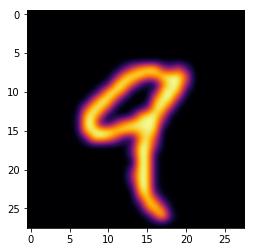

标签: tensor(9)


In [9]:
# 显示第几张图片
location=4
# 转换为numpy矩阵，然后代入data
data = images[location].numpy()
print(data.shape)
# 调整数据通道以用于matplotlib的绘制
reshaped_data=data.reshape(28,28)
# 从数据中绘制图像
plt.imshow(reshaped_data, cmap='inferno', interpolation='bicubic')
plt.show()
print('标签:', labels[location])

## 准备训练数据和测试数据

In [10]:
# 训练数据
train_data_with_labels = MNIST(data_folder, train=True, download=True, transform=transforms.ToTensor())
train_data_loader = DataLoader(train_data_with_labels,batch_size=BATCH_SIZE,shuffle=True)

# 测试数据
test_data_with_labels = MNIST(data_folder, train=False, download=True, transform=transforms.ToTensor())
test_data_loader = DataLoader(test_data_with_labels,batch_size=BATCH_SIZE,shuffle=True)

## 神经网络的定义

In [11]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    # 输入层
    self.layer1 = nn.Linear(28 * 28, 100)
    # 中间层（隐藏层）
    self.layer2 = nn.Linear(100, 50)
    # 输出层
    self.layer3 = nn.Linear(50,10)
        
  def forward(self, input_data):
    input_data = input_data.view(-1, 28 * 28)
    input_data = self.layer1(input_data)
    input_data = self.layer2(input_data)
    input_data = self.layer3(input_data)
    return input_data

## 模型

In [12]:
model = MLP()

## 定义成本函数和优化方法



In [13]:
import torch.optim as optimizer

# 交叉熵
lossResult = nn.CrossEntropyLoss()
# SGD
optimizer = optimizer.SGD(model.parameters(), lr=0.01)

## 学习


In [16]:
# 最大学习次数
MAX_EPOCH=4

for epoch in range(MAX_EPOCH):
  total_loss = 0.0
  for i, data in enumerate(train_data_loader):
    
    # 从数据中检索提取训练数据和教师标签数据
    train_data, teacher_labels = data
    
    # 将输入转换为torch.autograd.Variable
    train_data, teacher_labels = Variable(train_data), Variable(teacher_labels)
    
    # 删除计算出的梯度信息
    optimizer.zero_grad()
    
    # 为模型提供训练数据来计算预测
    outputs = model(train_data)
    
    # 基于loss和w的微分计算
    loss = lossResult(outputs, teacher_labels)
    loss.backward()
    
    # 更新梯度
    optimizer.step()
    
    # 累计误差
#    total_loss += loss.data[0]
    total_loss += loss.data
    
    # 以2000个小型批处理为单位显示进度
    if i % 2000 == 1999:
     print('学习进度：[%d, %d]　学习误差（loss）: %.3f' % (epoch + 1, i + 1, total_loss / 2000))
  #    total_loss = 0.0
        
print('学习结束')

学习进度：[1, 2000]　学习误差（loss）: 0.830
学习进度：[1, 4000]　学习误差（loss）: 1.202
学习进度：[1, 6000]　学习误差（loss）: 1.550
学习进度：[2, 2000]　学习误差（loss）: 0.306
学习进度：[2, 4000]　学习误差（loss）: 0.618
学习进度：[2, 6000]　学习误差（loss）: 0.919
学习进度：[3, 2000]　学习误差（loss）: 0.295
学习进度：[3, 4000]　学习误差（loss）: 0.584
学习进度：[3, 6000]　学习误差（loss）: 0.893
学习进度：[4, 2000]　学习误差（loss）: 0.284
学习进度：[4, 4000]　学习误差（loss）: 0.567
学习进度：[4, 6000]　学习误差（loss）: 0.859
学习结束


## 测试

In [17]:
import torch
# 总计
total = 0
# 正确答案
count_when_correct = 0

#
for data in test_data_loader:
  # 从测试数据加载器中检索数据，然后将其解包
  test_data, teacher_labels = data
  # 将转换测试数据，然后将其传递给模型，使其作出判断
  results = model(Variable(test_data))
  # 获取预测
  _, predicted = torch.max(results.data, 1)
  #
  total += teacher_labels.size(0)
  count_when_correct += (predicted == teacher_labels).sum()

    
print('count_when_correct:%d'%(count_when_correct))
print('total:%d'%(total))

print('正确率：%d / %d = %f'% (count_when_correct, total, int(count_when_correct)/int(total)))

count_when_correct:9174
total:10000
正确率：9174 / 10000 = 0.917400


## 用个别数据进行测试

标签： tensor(3)


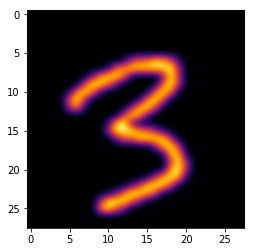

In [18]:
test_iterator = iter(test_data_loader)
# 可以增加或减少次数，以获得不同的测试数据
test_data, teacher_labels = test_iterator.next()
# 转换测试数据，然后将其传递给模型，使其作出判断
results = model(Variable(test_data))
_, predicted_label = torch.max(results.data, 1)

location=1
plt.imshow(test_data[location].numpy().reshape(28, 28), cmap='inferno', interpolation='bicubic')
print('标签：', predicted_label[location])